In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline

In [81]:
df=pd.read_csv('MY2014.csv',encoding ='ISO-8859-1')

In [82]:
df.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION*,Unnamed: 9,...,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220
0,YEAR,NaN,# = high output engine,NaN,(L),NaN,NaN,TYPE,CITY (L/100 km),HWY (L/100 km),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's do some cleaning, dropping Nan rows and removing first row (just units)

In [83]:
df.drop(df.index[0],inplace=True)
df.dropna(axis=1,how='all',inplace=True)
df.dropna(axis=0,how='any',inplace=True)
df.head()
df.shape

(1072, 13)

### Checking how the dataframe looks now:

In [84]:
df

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION*,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 EMISSIONS
1,2014,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33,196
2,2014,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,9.6,29,221
3,2014,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,5.9,48,136
4,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.1,25,255
5,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.1,8.7,10.6,27,244
6,2014,ACURA,RLX,MID-SIZE,3.5,6.0,AS6,Z,11.9,7.7,10.0,28,230
7,2014,ACURA,TL,MID-SIZE,3.5,6.0,AS6,Z,11.8,8.1,10.1,28,232
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6.0,AS6,Z,12.8,9.0,11.1,25,255
9,2014,ACURA,TL AWD,MID-SIZE,3.7,6.0,M6,Z,13.4,9.5,11.6,24,267
10,2014,ACURA,TSX,COMPACT,2.4,4.0,AS5,Z,10.6,7.5,9.2,31,212


### Renaming columns with proper names: 

In [85]:
df.columns = ['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINESIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL', 'City','HWY','COMB','COMBmpg','CO2Emission']

In [86]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  1072
Columns  :  13

Features : 
 ['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINESIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL', 'City', 'HWY', 'COMB', 'COMBmpg', 'CO2Emission']

Missing values :   0

Unique values :  
 MODEL              1
MAKE              40
MODEL.1          666
VEHICLE CLASS     16
ENGINESIZE        45
CYLINDERS          7
TRANSMISSION      22
FUEL               4
City             168
HWY              118
COMB             148
COMBmpg           43
CO2Emission      159
dtype: int64


#### wehave 1072 rows and 13 columns (features). The list of features includes ['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINESIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL', 'City', 'HWY', 'COMB', 'COMBmpg', 'CO2Emission']:  
Model: year of the edition of the car  
MAke: the manufacturer  
Model.1: model of the car  
VEHICLE CLASS: class type of the car  
ENGINESIZE: unit is litre  
CYLINDERS: number of cylinders  
TRANSMISSION: different types of manual and automatic transmissions  
FUEL: types of fuels: X = regular gasoline; Z = premium gasoline; D = diesel; E = E85(ethanol fuel blend of 85%     ethanol fuel and 15% gasolin)  
City: city fuel consumption  L per 100km  
HWY: highway fuel consumption L per 100km  
COMB: combined fuel consumption L per 100km  
COMPmpg: combined fuel consumption mpg 
CO2Emission: Grams of CO2 emitted per km





## Data Exploration

In [87]:
print(df.dtypes)

MODEL             object
MAKE              object
MODEL.1           object
VEHICLE CLASS     object
ENGINESIZE        object
CYLINDERS        float64
TRANSMISSION      object
FUEL              object
City              object
HWY               object
COMB              object
COMBmpg           object
CO2Emission       object
dtype: object


In [88]:
df[['ENGINESIZE','CYLINDERS', 'City','HWY','COMB','COMBmpg','CO2Emission']]=df[['ENGINESIZE','CYLINDERS', 'City','HWY','COMB','COMBmpg','CO2Emission']].astype(np.float)

<h2>Categorical Variables</h2>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

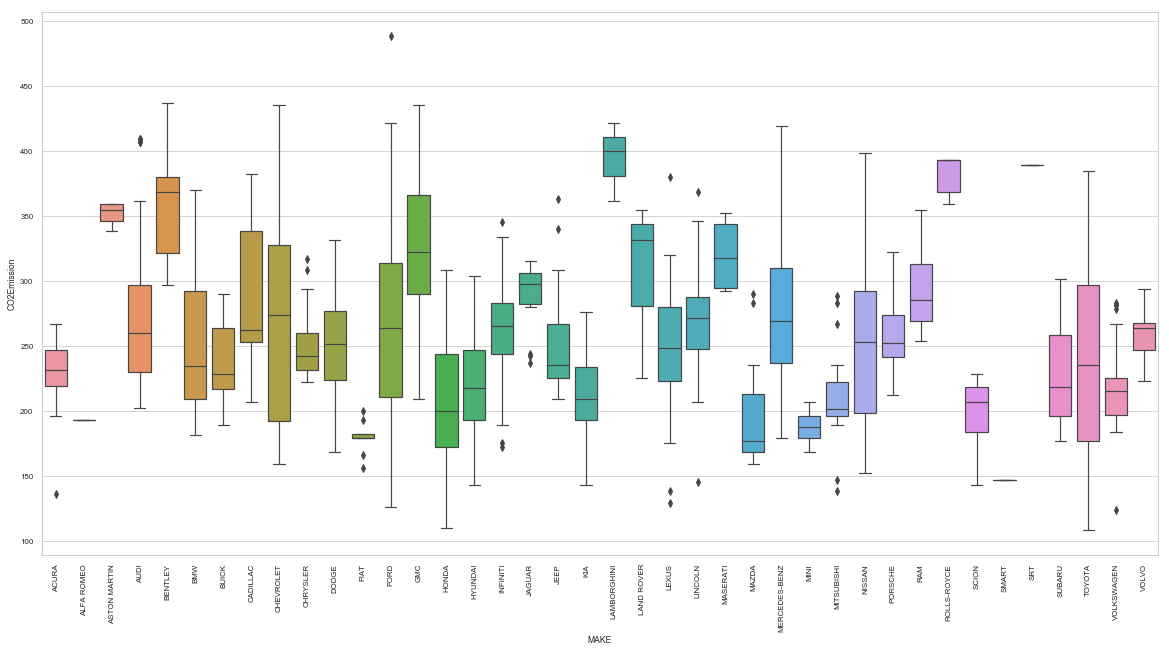

In [135]:
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9)                                                  
plt.figure(figsize=(20, 10))                                                                                                                                                                                                                                 
color = sns.color_palette("Set2", 6)
g =sns.boxplot(x="MAKE", y="CO2Emission", data=df)
sns.set(rc={'figure.figsize':(80,50)})
plt.xticks(rotation=90)

#### Both the median and weights are quite different between different models. Some important observations are:   
- Most of the medians are located somewhere between 200 gCO2/kmFuel and 300 gCO2/kmFuel  
- Lamborghini has the highest overal CO2 emission with median located at about 400 gCO2/kmFuel  
- Cars made by Chevrolet, FORD, GMIC, Mercedes-Benz and Nissan have the largest variety in CO2 emissions.



(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

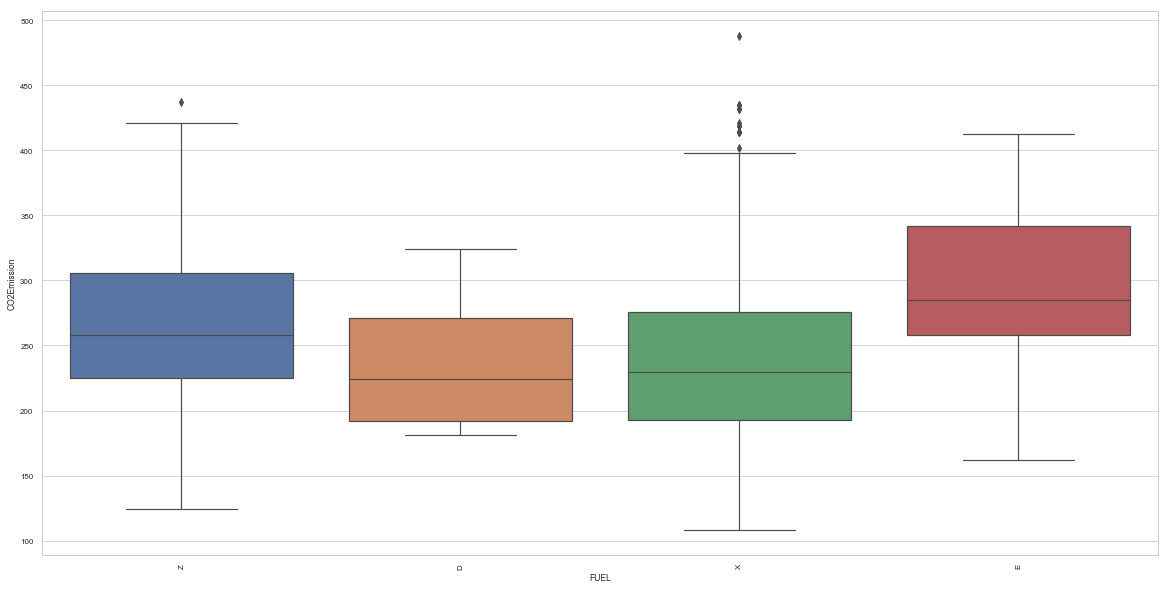

In [137]:
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9)                                                  
plt.figure(figsize=(20, 10))                                                                                                                                                                                                                                 
color = sns.color_palette("Set2", 6)
h =sns.boxplot(x="FUEL", y="CO2Emission", data=df)
sns.set(rc={'figure.figsize':(80,50)})
plt.xticks(rotation=90)




### When comparing between different fuels, it can be seen that:
- the medians are all located roughly beween 220 and 270 gCO2/kmFUEL
- Despite the medians being similar, cars using regualr and premium gas (X and Z) have wider spreads, up to 400 gCO2/kmFUEL
- Cars consuming dieselfuel have the narrowest CO2 emission distrbution range

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

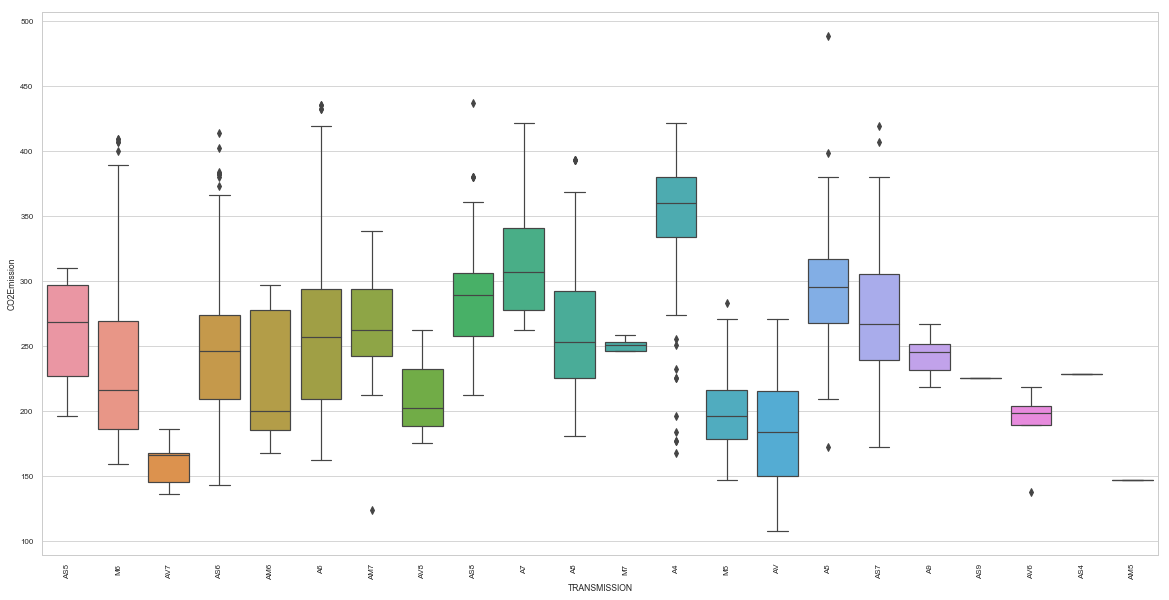

In [146]:
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9)                                                  
plt.figure(figsize=(20, 10))                                                                                                                                                                                                                                 
color = sns.color_palette("Set2", 6)
j =sns.boxplot(x="TRANSMISSION", y="CO2Emission", data=df)
sns.set(rc={'figure.figsize':(80,50)})
plt.xticks(rotation=90)



- there is a lot of variation in medians as well as distribution of different transmissions, suggesting it can be a good predicotr of CO2 emission
- A4 , which is 7 manual gear, has the highest CO2 emission with median in around 320 gCO2/kmFUEL

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

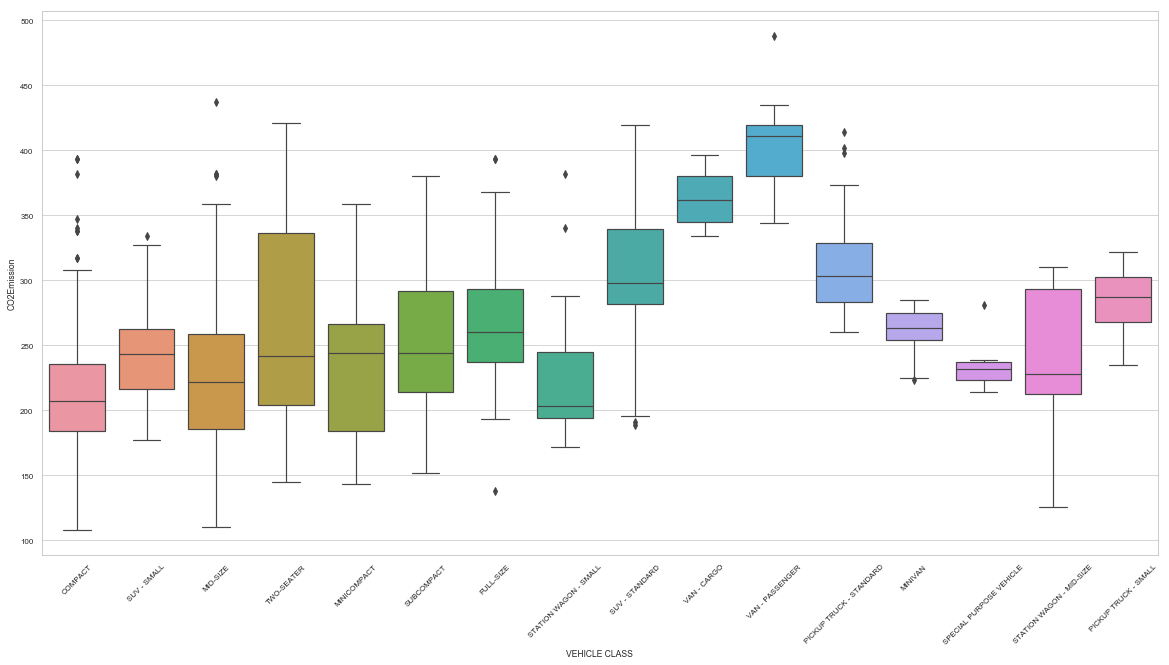

In [142]:
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9)                                                  
plt.figure(figsize=(20, 10))                                                                                                                                                                                                                                 
color = sns.color_palette("Set2", 6)
k =sns.boxplot(x="VEHICLE CLASS", y="CO2Emission", data=df)
sns.set(rc={'figure.figsize':(80,50)})
plt.xticks(rotation=45)


- The median variation for different class of vehicles is significant, with minimum for station-wagon-small and compact at about 220 gCO2/kmFUEL and aximum for van-passenger at over 400 gCO2/kmFUEL
- class of vehicles can b a good predictor of CO2 emission

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

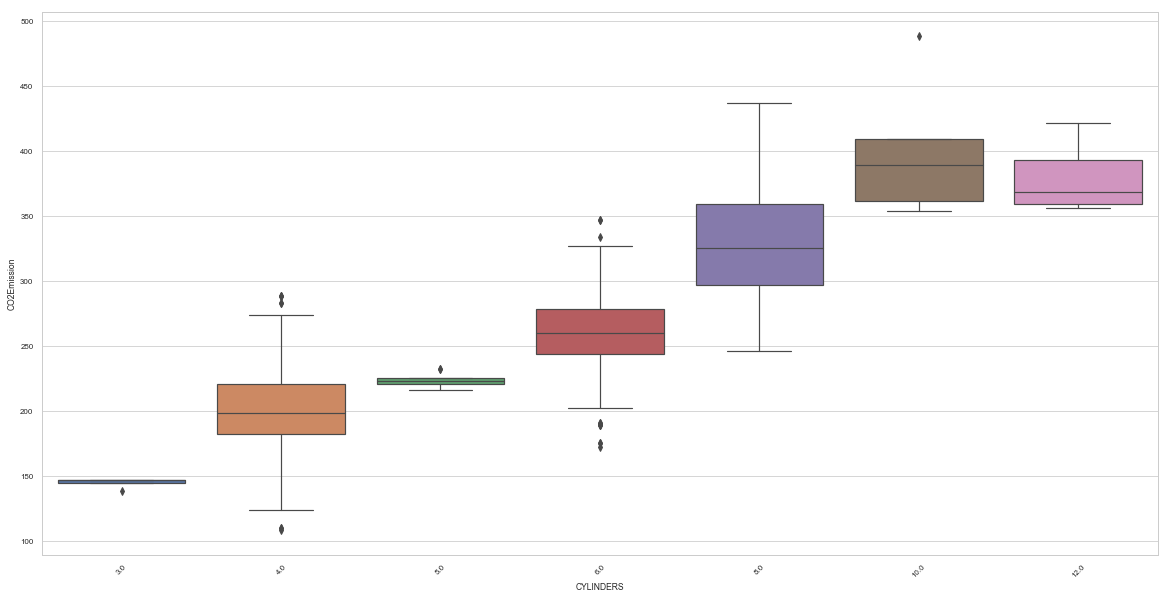

In [147]:
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9)                                                  
plt.figure(figsize=(20, 10))                                                                                                                                                                                                                                 
color = sns.color_palette("Set2", 6)
l =sns.boxplot(x="CYLINDERS", y="CO2Emission", data=df)
sns.set(rc={'figure.figsize':(80,50)})
plt.xticks(rotation=45)


- large difference between medians, with smallest for 3 cylinder cars (at about a 100 gCO2/kmFUEL), increasing with the number of cylinders to about 400 gCO2/kmFUEL for cars with 10 and 12 cylinders
- the distribution is the largest for 8 cylinders cars, suggesting it is highly dependent of other factors in that case
- the varation between  medians and distribution suggests cylinders have to be considered as a factor in prediting CO2 emission

<h2 id="discriptive_statistics"> Descriptive Statistical Analysis</h2>

In [94]:
df.describe()

,ENGINESIZE,CYLINDERS,City,HWY,COMB,COMBmpg,CO2Emission
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,3.340578,5.786381,13.276026,9.464366,11.565112,26.486007,255.913246
std,1.415152,1.797415,4.104639,2.793379,3.486813,7.496391,63.442769
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.200000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.500000,10.725000,13.300000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [95]:
df.describe(include=['object'])

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,TRANSMISSION,FUEL
count,1072,1072,1072,1072,1072,1072
unique,1,40,666,16,22,4
top,2014,FORD,F-150 FFV,MID-SIZE,A6,X
freq,1072,90,8,180,222,518


### Let's look at number of values for each category to make sure there is enough data to rely on:

In [96]:
for i in ['MAKE', 'MODEL.1', 'VEHICLE CLASS', 'CYLINDERS', 'TRANSMISSION', 'FUEL']:
    print (df[i].value_counts().to_frame())

               MAKE
FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
AUDI             49
TOYOTA           49
GMC              49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
KIA              35
NISSAN           33
JEEP             33
CADILLAC         32
MAZDA            27
HYUNDAI          24
SUBARU           23
LEXUS            22
JAGUAR           22
HONDA            21
INFINITI         21
LAND ROVER       19
CHRYSLER         19
BUICK            16
MITSUBISHI       16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ASTON MARTIN      7
ROLLS-ROYCE       7
MASERATI          6
LAMBORGHINI       3
SRT               2
SMART             2
ALFA ROMEO        1
                              MODEL.1
F-150 FFV                           8
F-150 FFV 4X4                       8
FOCUS FFV                           6
ACCORD                      

#### for example, there are less than 10 cars with 5, 10 or 3 cylinders, so there is not enough data on them to be considered when modeling

In [97]:
pearson_coef, p_value = stats.pearsonr(df['ENGINESIZE'], df['CO2Emission'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8734585398526064  with a P-value of P = 0.0


<h2>Continuous numerical variables:</h2> 

In [98]:
df.corr()

,ENGINESIZE,CYLINDERS,City,HWY,COMB,COMBmpg,CO2Emission
ENGINESIZE,1.000000,0.934175,0.832063,0.778761,0.819386,-0.806588,0.873459
CYLINDERS,0.934175,1.000000,0.797084,0.725161,0.777404,-0.769930,0.849740
City,0.832063,0.797084,1.000000,0.965631,0.995533,-0.935456,0.898658
HWY,0.778761,0.725161,0.965631,1.000000,0.985764,-0.893326,0.862239
COMB,0.819386,0.777404,0.995533,0.985764,1.000000,-0.927724,0.892732
COMBmpg,-0.806588,-0.769930,-0.935456,-0.893326,-0.927724,1.000000,-0.906779
CO2Emission,0.873459,0.849740,0.898658,0.862239,0.892732,-0.906779,1.000000


In [99]:
#same if we do the pearson value one by one:
pearson_coef, p_value = stats.pearsonr(df['ENGINESIZE'], df['CO2Emission'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8734585398526064  with a P-value of P = 0.0


<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

highest positive cor. with combined fuel consumption in L/100km and highest negative correlation with combined fuel consumption in mpg

(0, 507.27342607327597)

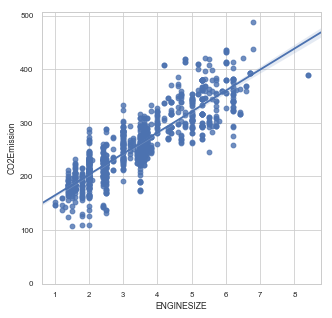

In [195]:
fig = plt.figure(figsize = (5,5))
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9)                                                                                                                                                                                                                                                                                
sns.regplot(x="ENGINESIZE", y="CO2Emission", data=df)
plt.ylim(0,)

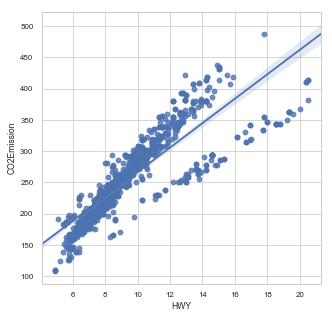

In [196]:
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9)                                                  
plt.figure(figsize=(5, 5))
sns.regplot(x="HWY", y="CO2Emission", data=df)

In [152]:
cdf = df[['ENGINESIZE','CYLINDERS', 'COMB','CO2Emission']]

In [153]:
cdf.head()

,ENGINESIZE,CYLINDERS,COMB,CO2Emission
1,2.0,4.0,8.5,196.0
2,2.4,4.0,9.6,221.0
3,1.5,4.0,5.9,136.0
4,3.5,6.0,11.1,255.0
5,3.5,6.0,10.6,244.0


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


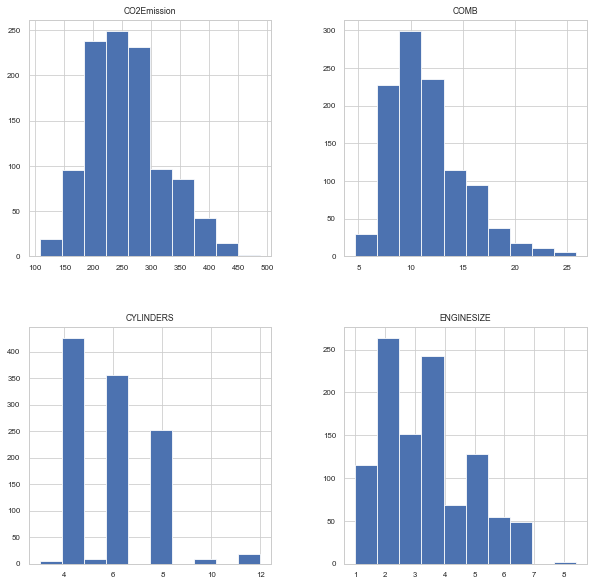

In [169]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
cdf.hist(ax = ax)
plt.show()

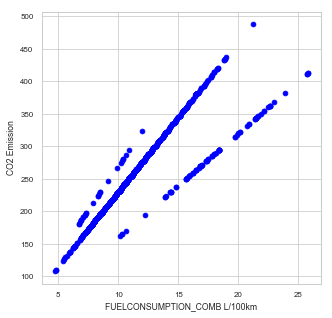

In [173]:
fig = plt.figure(figsize = (5,5))
plt.scatter(cdf.COMB, cdf.CO2Emission,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB L/100km")
plt.ylabel("CO2 Emission")
plt.show()

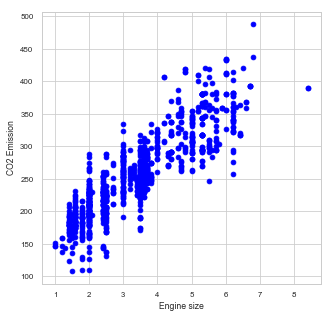

In [174]:
fig = plt.figure(figsize = (5,5))
plt.scatter(cdf.ENGINESIZE, cdf.CO2Emission,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

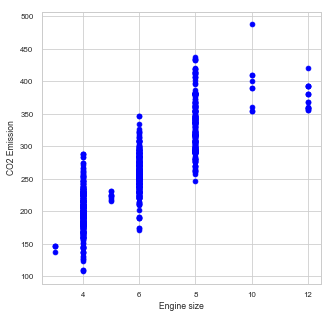

In [175]:
fig = plt.figure(figsize = (5,5))
plt.scatter(cdf.CYLINDERS, cdf.CO2Emission,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

## Let's use a simple linear regression model to predict CO2 emission based on engine size
### To do so, first we need to split our dataframe (cdf) to test and train, with 20% of the data in test and rest to train the model

In [176]:
#creating the test and train set in cdf dataframe:
msk = np.random.rand(len(cdf)) < 0.8
np.where(np.isnan(cdf))

train = cdf[msk]
test = cdf[~msk]
col_mask=cdf.isnull().any(axis=0) 

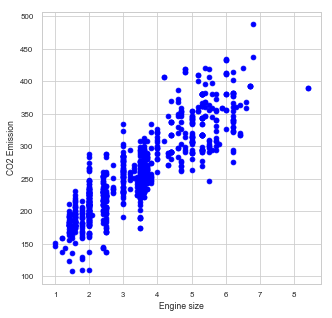

In [197]:
#plotting train set to see if it is a good representarive
fig = plt.figure(figsize = (5,5))
plt.scatter(train.ENGINESIZE, train.CO2Emission,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

## What are the coefficients of the fit? 

In [198]:
#linear reg model training
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2Emission']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.581809]]
Intercept:  [124.60469012]


### Let's plot the fit

Text(0, 0.5, 'Emission')

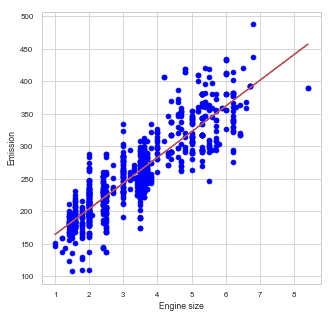

In [199]:
#plotting the linear reg model
fig = plt.figure(figsize = (5,5))
plt.scatter(train.ENGINESIZE, train.CO2Emission,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

### How accurate is this fit?
#### We will look at  

In [200]:
#accuracy of the linear reg model
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2Emission']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 22.74
Residual sum of squares (MSE): 883.33
R2-score: 0.68


In [201]:
cdf1 = df[['ENGINESIZE','CYLINDERS','City','HWY','COMB','CO2Emission']]

In [202]:
cdf1.head()

,ENGINESIZE,CYLINDERS,City,HWY,COMB,CO2Emission
1,2.0,4.0,9.9,6.7,8.5,196.0
2,2.4,4.0,11.2,7.7,9.6,221.0
3,1.5,4.0,6.0,5.8,5.9,136.0
4,3.5,6.0,12.7,9.1,11.1,255.0
5,3.5,6.0,12.1,8.7,10.6,244.0


In [207]:
#test train split on cdf1
msk = np.random.rand(len(df)) < 0.8
train1 = cdf1[msk]
test1 = cdf1[~msk]

In [208]:
#multiple linear reg model train based on 'ENGINESIZE','CYLINDERS','COMB'
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train1[['ENGINESIZE','CYLINDERS','COMB']])
y = np.asanyarray(train1[['CO2Emission']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[10.94999802  7.11918994  9.61219964]]


In [209]:
#multiple linear model test
y_hat= regr.predict(test1[['ENGINESIZE','CYLINDERS','COMB']])
x = np.asanyarray(test1[['ENGINESIZE','CYLINDERS','COMB']])
y = np.asanyarray(test1[['CO2Emission']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 564.48
Variance score: 0.88


In [210]:
#multiple linear reg model train based on 'ENGINESIZE','CYLINDERS',''City'
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train1[['ENGINESIZE','CYLINDERS','City']])
y = np.asanyarray(train1[['CO2Emission']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.39686481  5.96794913  8.41984583]]


In [211]:
#multiple linear model test
y_hat= regr.predict(test1[['ENGINESIZE','CYLINDERS','City']])
x = np.asanyarray(test1[['ENGINESIZE','CYLINDERS','City']])
y = np.asanyarray(test1[['CO2Emission']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 574.02
Variance score: 0.87


In [212]:
#multiple linear reg model train based on 'ENGINESIZE','CYLINDERS', 'HWY'
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train1[['ENGINESIZE','CYLINDERS','HWY']])
y = np.asanyarray(train1[['CO2Emission']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.83279414  9.09853989 10.5053785 ]]


In [213]:
#multiple linear model test
y_hat= regr.predict(test1[['ENGINESIZE','CYLINDERS','HWY']])
x = np.asanyarray(test1[['ENGINESIZE','CYLINDERS','HWY']])
y = np.asanyarray(test1[['CO2Emission']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 588.03
Variance score: 0.87


# Let's use tkinter to create a Graphic User Interface (GUI) to ask the user about number of cylinders, engine size and fuel consumption (highway) and predict the CO2 emission of their car:

In [214]:
import tkinter as tk 

root= tk.Tk() 
 
canvas1 = tk.Canvas(root, width = 1200, height = 450)
canvas1.pack()

# with sklearn
#Intercept_result = ('Intercept: ', regr.intercept_)
#label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
#canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

# with statsmodels
#print_model = model.summary()
#label_model = tk.Label(root, text=print_model, justify = 'center', relief = 'solid', bg='LightSkyBlue1')
#canvas1.create_window(800, 220, window=label_model)


# New_Interest_Rate label and input box
label1 = tk.Label(root, text='Engine Size: ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_Unemployment_Rate label and input box
label2 = tk.Label(root, text='Number of Cylinders: ')
canvas1.create_window(100, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)

# New_Unemployment_Rate label and input box
label3 = tk.Label(root, text='Fuel Consumption: ')
canvas1.create_window(100, 140, window=label3)

entry3 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 140, window=entry3)


def values(): 
    global Engine_Size #our 1st input variable
    Engine_Size = float(entry1.get()) 
    
    global N_of_Cylinders #our 2nd input variable
    N_of_Cylinders = float(entry2.get()) 
    
    global Fuel_Consumption #our 3rd input variable
    Fuel_Consumption = float(entry3.get())
    
    Prediction_result  = ('Predicted CO2 Emission: ', regr.predict([[Engine_Size ,N_of_Cylinders,Fuel_Consumption]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict CO2 Consumption',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 180, window=button1)

root.mainloop()
 
